In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [3]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_27_52_2T3W1RFV0MC103811following_real_vehicle_rl0705.bag'
b = bagreader(file_path)

[INFO]  Data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_27_52_2T3W1RFV0MC103811following_real_vehicle_rl0705 already exists. Not creating.


In [4]:
filename = file_path.split('/')[-1]

In [5]:
b.topic_table

Topics                       Types  Message Count     Frequency
0            /accel            std_msgs/Float64          10142    180.765591
1        /cmd_accel            std_msgs/Float64          10105    316.599034
2          /cmd_vel         geometry_msgs/Twist           2027     19.950598
3         /commands            std_msgs/Float64          10149    100.021558
4        /highbeams            std_msgs/Float64            102      0.999940
5        /lead_dist            std_msgs/Float64           1012    140.001469
6          /rel_vel         geometry_msgs/Twist           2970     39.063294
7           /rosout           rosgraph_msgs/Log             11  26462.485804
8       /rosout_agg           rosgraph_msgs/Log             10  37786.522523
9   /steering_angle            std_msgs/Float64          10160    100.573182
10        /track_a0  geometry_msgs/PointStamped           2034     19.989153
11        /track_a1  geometry_msgs/PointStamped           2034     19.973066
12       /track_a10  geometry_msgs/PointStamped           2032     20.004216
13       /track_a11  geometry_msgs/PointStamped           2032     19.990392
14       /track_a12  geometry_msgs/PointStamped           2029     19.996443
15       /track_a13  geometry_msgs/PointStamped           2029     19.988010
16       /track_a14  geometry_msgs/PointStamped           2029     19.993441
17       /track_a15  geometry_msgs/PointStamped           2029     19.978632
18        /track_a2  geometry_msgs/PointStamped           2034     19.990677
19        /track_a3  geometry_msgs/PointStamped           2034     20.001545
20        /track_a4  geometry_msgs/PointStamped           2032     19.997158
21        /track_a5  geometry_msgs/PointStamped           2034     19.993250
22        /track_a6  geometry_msgs/PointStamped           2032     19.995157
23        /track_a7  geometry_msgs/PointStamped           2032     20.004693
24        /track_a8  geometry_msgs/PointStamped           2034     20.013570
25        /track_a9  geometry_msgs/PointStamped           2034     20.014621
26     /v_des_delta            std_msgs/Float64           2023     19.950124
27             /vel         geometry_msgs/Twist           5072     49.988725

In [7]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
CMD_VEL = b.message_by_topic('/cmd_vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
V_DES_DELTA = b.message_by_topic('/v_des_delta')

In [8]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_v_des_delta = pd.read_csv(V_DES_DELTA)
df_cmd_vel = pd.read_csv(CMD_VEL)
t0 = df_vel['Time'][0]

In [10]:
# df_v_des_delta

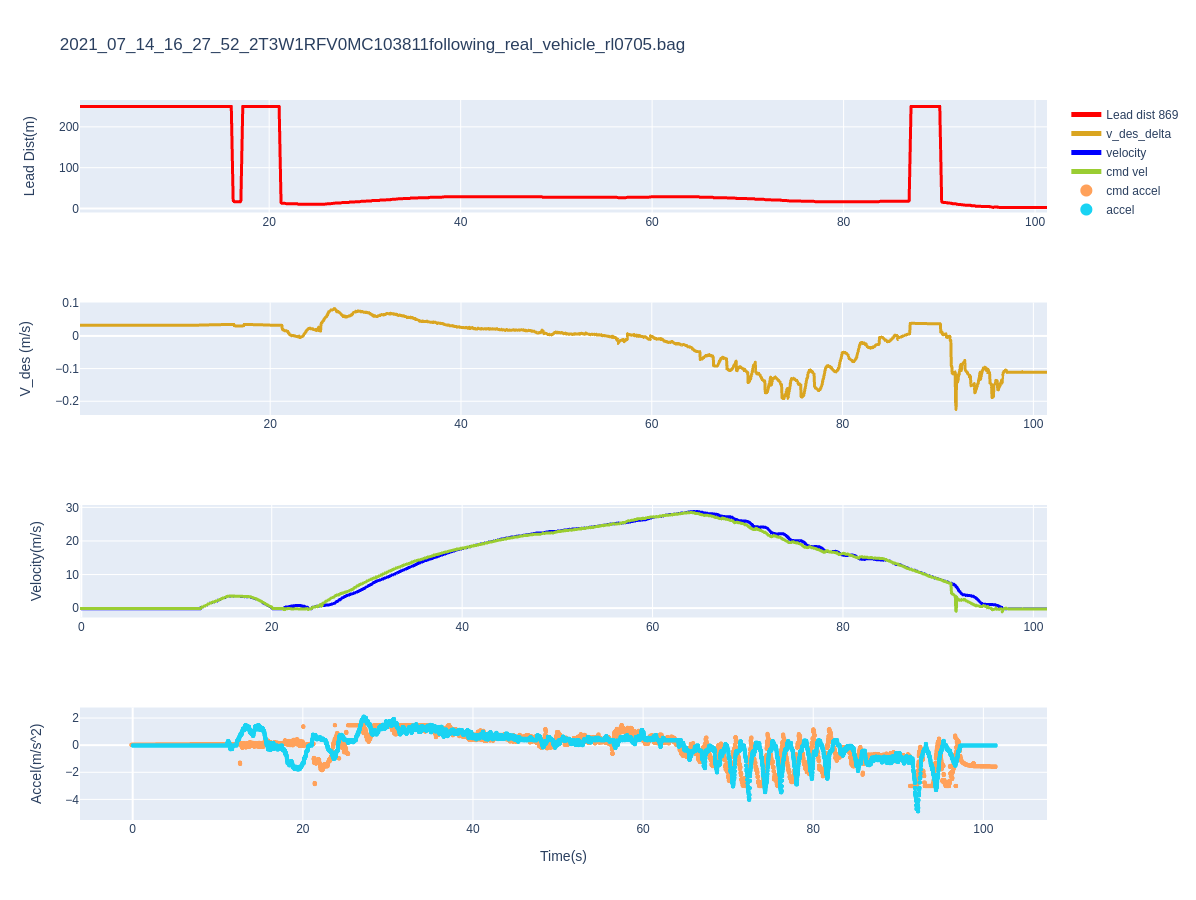

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des_delta['Time']-t0,
    y=df_v_des_delta['data'],
     name="v_des_delta",
      line=dict(
        width=3,
          color="goldenrod",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="V_des (m/s)", row=2, col=1)
figr.update_yaxes(title_text="Velocity(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=800, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()